## Data inladen

In [1]:
import pandas as pd
import json
import sklearn.metrics.pairwise as pw
import numpy as np
import matplotlib.pyplot as plt

def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [24]:
# Load data for town called Ambridge
data_path = 'yelp/yelp/data/Ajax/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [25]:
display(reviews.head())
display(businesses.head())
display(users.head())
#display(tips.head())

#display(checkins.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LJvIokosoDuipaQjk0QyUg,PVPt47alaCdvnr1PAPfu8A,-4-MzST67P_jnX4mh3MIcw,5.0,0,0,0,Always fresh and incredible delicious. Wide ra...,2015-07-28 14:05:27
1,Hqv2mqj9sG1uiKQlIuyEsA,BAPHD9v3QOPnZTILIsNmmA,V84YoNmnXlp3EK50jWSFpA,1.0,0,0,0,If I could give a zero I would. Went in to see...,2017-01-15 04:59:00
2,yzW6H6_PqDvzW0AqnOtCFA,vN5zGsljpV_LmBEAfhjDvA,sSWy-yEYPCHLss0LvmAhhA,4.0,2,0,0,Great place to have breakfast during the week ...,2013-11-14 15:30:07
3,6apnMSCi0HtDCSc07JVMXQ,5DCrTNKPpGBOJORIRu7SYQ,dBNZXjBw6w6l9QBj34BiFw,4.0,0,0,0,This harvey is in the swiss chalet. Good ampl...,2017-01-28 18:17:55
4,jqHpLoyvSa3u8yQcU5LPEg,zFGpxwJewI6OjC2u9EnZ-g,-4-MzST67P_jnX4mh3MIcw,5.0,0,0,0,Busy place - excellent coffee - tasty sandwich...,2016-02-24 00:58:37


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,qxFVwTstR5BuFa4kY50akQ,Swiss Chalet Rotisserie & Grill,1993 Salem Rd N,Ajax,ON,L1T 0J9,43.898070,-79.029014,3.5,8,1,"{'RestaurantsReservations': 'False', 'GoodForK...","Comfort Food, Restaurants, American (Traditional)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
1,ZDx7kt4aOPTlmYTqXDrTGA,Canbe Foods,336 Rossland Avenue,Ajax,ON,L1Z 0L9,43.883689,-79.017227,4.0,15,1,"{'RestaurantsDelivery': 'True', 'Caters': 'Tru...","Indian, Restaurants, Sri Lankan","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,wyNtE5qN35asNZpX55W3sw,Maraschino Cafe and Italian Bakery,109 Old Kingston Road,Ajax,ON,L1T 3A6,43.853837,-79.059910,4.5,11,0,"{'GoodForKids': 'True', 'HasTV': 'True', 'Rest...","Restaurants, Italian, Food, Bakeries, Cafes","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
3,sSWy-yEYPCHLss0LvmAhhA,Eggs Crepes Restaurant,250 Bayly Street W,Ajax,ON,L1S 3V4,43.842562,-79.027714,3.5,5,1,"{'Caters': 'True', 'Ambience': 'None', 'Alcoho...","Restaurants, Creperies, Breakfast & Brunch","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
4,3egQ7WCM-zQn9SXEBXbsDA,Lakeridge Health Oshawa,95 Bayly Street W,Ajax,ON,L1S 7K8,43.842768,-79.023965,1.0,3,1,None,None,None


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,_zPT9ZmR5-nUfsprzIiRew,Lisa,532,2013-06-14 18:42:18,777,178,504,"2014,2015,2016,2017,2018","J_tWHP2vBryzTkRQcgEQOw, uuh3kceI4pV8jk6h6KUhrQ...",24,...,0,0,1,0,22,37,45,45,33,6
1,nTo2QTtdg3IgeF5XPfbDkQ,Emily,5,2017-06-12 19:27:49,2,0,1,,"CvCUhv5HsWUEURrClT1t8w, MIBN3YynBJuv_gcNwGd3VQ...",0,...,0,0,0,0,0,0,0,0,0,0
2,pn_flI3EBNugBEYFp9okxQ,Colanie,536,2012-10-27 01:42:49,10108,5887,8966,"2016,2017,2018","Tqm7Wu7IBJ1td3Ab5ZpUhw, aI5v7ZewzvXMfWxza0m1kw...",140,...,89,150,105,21,633,1581,2278,2278,365,2013
3,-m0KTRk0c901-4b-BN34Gg,Jay,164,2009-04-02 20:08:04,634,230,354,"2009,2010","TJpPDsFGNm_MfO6Z3nqfDA, 3MNqjMzoMYHO0lSHEBpSCQ...",15,...,6,11,4,2,42,56,88,88,60,2
4,nyl_1VcRIAyI55bb_scpdw,Mary,965,2014-08-24 02:43:26,2009,795,1603,"2014,2015,2016,2017,2018","keLUgL_4y60BkppiAsIk8Q, peVCDWIUK1qX5tScxuQ07Q...",34,...,1,2,0,0,21,40,132,132,20,129


## Users kiezen

In [26]:
def usable_users2(users,reviews, threshold):
    userdict = dict()
    usable = list()
    for review in reviews.index:
        user = reviews.loc[review, "user_id"]
        if user not in userdict:
            userdict[user] = 1
        if user in userdict:
            userdict[user] = userdict[user] + 1
    for user in userdict:
        if userdict[user] >= threshold:
            usable.append(user)
    return usable
usable = usable_users2(users,reviews,5)

## Restaurants selecteren

In [27]:
restaurants = businesses.loc[businesses['categories'].str.contains('Restaurants|Food', na=False)]


## Reviews selecteren

In [28]:
reviews = reviews[reviews["user_id"].isin(usable)]


In [29]:
reviews = reviews[reviews['business_id'].isin(businesses["business_id"])]

In [30]:
reviews[['user_id', 'business_id', 'stars']]

,user_id,business_id,stars
0,PVPt47alaCdvnr1PAPfu8A,-4-MzST67P_jnX4mh3MIcw,5.0
2,vN5zGsljpV_LmBEAfhjDvA,sSWy-yEYPCHLss0LvmAhhA,4.0
4,zFGpxwJewI6OjC2u9EnZ-g,-4-MzST67P_jnX4mh3MIcw,5.0
5,zFGpxwJewI6OjC2u9EnZ-g,ZDx7kt4aOPTlmYTqXDrTGA,5.0
10,pPTKCA8ObrBWQNB4txBjaw,xu459t5SvTuXwxzqp3fiqg,5.0
...,...,...,...
3277,JesJ-LaNfr3pKhL7gWhDrw,witiuiTCW9vdozFB8WfxSQ,2.0
3278,Z09rco1enQXNCd9H0u7kvg,_f6AQfqMkhN17Oe7dhoubw,4.0
3280,Kj9cFO70zZOQorN0mgeLWA,P2Xmfckhi403Wg7PrqDauw,4.0
3286,vVHVLgvh2hSsglO4uGSEVg,632tj67V8Oqdh56elNvFng,1.0


## Utility matrix


In [31]:
def utilityCB(users, businesses, reviews):
       
    pivot = reviews.pivot_table(index="business_id", columns="user_id", values='stars').fillna(np.nan)
    
    return pivot

CButility = utilityCB(usable, restaurants, reviews)

## Categoriëen bewerken


In [32]:
def extract_categories(businesses):
    #restaurants = businesses[businesses['categories'].str.contains('Restaurants|Food', na=False)]
    rescategories = businesses[["business_id", "categories"]].copy()
    newdb = pd.DataFrame(columns=("business_id","categories"), dtype = str)
    for row in rescategories.index:
        cg = rescategories.loc[row, "categories"]
        bid = rescategories.loc[row, "business_id"]
        items = set(cg.split(","))
        rescategories.at[row,"categories"] = items  
        for item in items:
            newdb = newdb.append(pd.Series([bid, item], index=newdb.columns ), ignore_index=True)
                
    return newdb
df_categories = extract_categories(restaurants)
display(df_categories.head())

,business_id,categories
0,qxFVwTstR5BuFa4kY50akQ,Comfort Food
1,qxFVwTstR5BuFa4kY50akQ,American (Traditional)
2,qxFVwTstR5BuFa4kY50akQ,Restaurants
3,ZDx7kt4aOPTlmYTqXDrTGA,Restaurants
4,ZDx7kt4aOPTlmYTqXDrTGA,Sri Lankan


In [33]:
def deletewords(df):
    dropper = list()
    dropping = df.copy()
    ndf = dropping[dropping['categories'].str.contains('Restaurants')]
    for row in ndf.index:
        dropper.append(row)
    dropping = dropping.drop(row for row in dropper)
    return dropping
            
df_categories = deletewords(df_categories)
display(df_categories.head())

,business_id,categories
0,qxFVwTstR5BuFa4kY50akQ,Comfort Food
1,qxFVwTstR5BuFa4kY50akQ,American (Traditional)
4,ZDx7kt4aOPTlmYTqXDrTGA,Sri Lankan
5,ZDx7kt4aOPTlmYTqXDrTGA,Indian
6,wyNtE5qN35asNZpX55W3sw,Cafes


In [34]:
def pivot_categories(df):
    """Create a one-hot encoded matrix for categories.
    
    Arguments:
    df -- a dataFrame containing at least the columns 'businessId' and 'categorie'
    
    Output:
    a matrix containing '0' or '1' in each cell.
    1: the business has the category
    0: the business does not have the category
    """
    return df.pivot_table(index = 'business_id', columns = 'categories', aggfunc = 'size', fill_value=0)
df_utility_categories = pivot_categories(df_categories)
display(df_utility_categories.head())

categories,Afghan,American (New),American (Traditional),Arabian,Arts & Entertainment,Asian Fusion,Automotive,Bagels,Bakeries,Barbeque,...,Pakistani,Pizza,Poutineries,Sandwiches,Seafood,Seafood Markets,Specialty Food,Sports Bars,Sushi Bars,Thai
business_id,,,,,,,,,,,,,,,,,,,,,
-4-MzST67P_jnX4mh3MIcw,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
-YGQwikbX2fXUIjyegR7pw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-mG8f5khTz8aGVoSCSFmow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0Jyc53wOZt4dbbVPrKjuxA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0ZNIAF_1d83uK1Z7mADTfA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Jaccard similarity

In [35]:
def create_similarity_matrix_jaccard(matrix):
    m11 = matrix @ matrix.T
    m10 = pd.DataFrame(matrix.sum(axis = 1).values + np.zeros(m11.shape), index = m11.index, columns = m11.index)
    m01 = m10.T
    return m11/(m01 + m10 - m11)
    
df_similarity_categories = create_similarity_matrix_jaccard(df_utility_categories)
display(df_similarity_categories)

business_id,-4-MzST67P_jnX4mh3MIcw,-YGQwikbX2fXUIjyegR7pw,-mG8f5khTz8aGVoSCSFmow,0Jyc53wOZt4dbbVPrKjuxA,0ZNIAF_1d83uK1Z7mADTfA,14T3cCQcTjAHzoE_4r1bxw,1FnwvtISSL0HxIdPLLow1g,1PPHo4ZldEQDMkKlqTgqzQ,1mzjn8nQgipFTIrPfCeCmQ,1p3YpI-mspxnYZI614CyXA,...,wxjK5_i2GsJjqe1_7cpFGA,wyNtE5qN35asNZpX55W3sw,xu459t5SvTuXwxzqp3fiqg,ysoRfeir3cl_uKEyLl7Waw,z9ZjlL0hmX45lUWxN4HVDA,zKZLxl3yBN_hVKJS7kEcuA,zKtLlYDnjhoC5siq1A84gw,zifXaOz_d2dd5QR3d-kTGg,zoJZ_LgSBq3YznjrzXkG3Q,zq0_6zcREu5VGSbfqujtMA
business_id,,,,,,,,,,,,,,,,,,,,,
-4-MzST67P_jnX4mh3MIcw,1.0,0.0,0.000000,0.0,0.000000,0.333333,0.0,0.000000,0.000000,0.0,...,0.0,0.200000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
-YGQwikbX2fXUIjyegR7pw,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
-mG8f5khTz8aGVoSCSFmow,0.0,0.0,1.000000,0.0,0.166667,0.000000,0.0,0.333333,0.250000,0.0,...,0.0,0.200000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.250000
0Jyc53wOZt4dbbVPrKjuxA,0.0,0.0,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
0ZNIAF_1d83uK1Z7mADTfA,0.0,0.0,0.166667,0.0,1.000000,0.000000,0.0,0.166667,0.142857,0.0,...,0.0,0.285714,0.0,0.0,0.0,0.100000,0.000000,0.000000,0.0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zKZLxl3yBN_hVKJS7kEcuA,0.0,0.0,0.000000,0.0,0.100000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.571429,0.222222,0.0,0.000000
zKtLlYDnjhoC5siq1A84gw,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.571429,1.000000,0.250000,0.0,0.000000
zifXaOz_d2dd5QR3d-kTGg,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.142857,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.222222,0.250000,1.000000,0.0,0.000000


## Aanbevelingen doen

In [36]:
def determine_recommendations(user):
    similarities = list()
    rev = reviews.loc[(reviews['user_id'] == user) & (reviews['stars'] >= 4)]
    for user_business in rev.business_id:
            for name in df_similarity_categories:
                if name not in rev.business_id:
                    if user_business in df_similarity_categories[name]:
                        if (df_similarity_categories[user_business][name] > 0) & (df_similarity_categories[user_business][name] < 1):
                            score = df_similarity_categories[user_business][name]

                            similarities.append((user_business, name, score))
                            similarities = sorted(similarities, reverse=True, key=lambda x: x[2])
    print([x[1] for x in similarities[:20]])

    return similarities[:20]

userid = "CxDOIDnH8gp9KXzpBHJYXw"
determine_recommendations(userid)

['UUsHZNqPR0ISQiCog1Aw_A', 'cu6165elp95ytVh5dQdzWw', '1PPHo4ZldEQDMkKlqTgqzQ', 'VPpeZPIS3WCyMPHJO__9Hg', 'WNTAuiZl1k3Rls2Hd6zASA', 'tGzFHzPHDBb3j4XAeYMqXQ', 'hmihDDBfP-Z7gvkm9pwteg', 'jpXk4jjINZjnTdvnzLO6Vg', '-4-MzST67P_jnX4mh3MIcw', '14T3cCQcTjAHzoE_4r1bxw', 'SKB_FQT41ATIo3zIy0Uipw', 'W6JDLxfW2RGRSv5z7J1hMg', 'cu6165elp95ytVh5dQdzWw', 'rUtb0ni8YoEqPSWUch8jPg', 'vWLJc9uexOvUveqpLwmvSQ', '-mG8f5khTz8aGVoSCSFmow', '1PPHo4ZldEQDMkKlqTgqzQ', '9WU7SeSmfK5wAMkUApihNQ', '9uGTVWSioqn6sDPd87uVWg', 'Em1SkoJ52mbyiUBz1_oW4Q']


[('npIJIIypRW9kGSx0b-wUQw', 'UUsHZNqPR0ISQiCog1Aw_A', 0.6),
 ('npIJIIypRW9kGSx0b-wUQw', 'cu6165elp95ytVh5dQdzWw', 0.5),
 ('_f6AQfqMkhN17Oe7dhoubw', '1PPHo4ZldEQDMkKlqTgqzQ', 0.5),
 ('npIJIIypRW9kGSx0b-wUQw', 'VPpeZPIS3WCyMPHJO__9Hg', 0.4),
 ('npIJIIypRW9kGSx0b-wUQw', 'WNTAuiZl1k3Rls2Hd6zASA', 0.4),
 ('YXQdOMaOknr7vv71b48A8Q', 'tGzFHzPHDBb3j4XAeYMqXQ', 0.4),
 ('npIJIIypRW9kGSx0b-wUQw', 'hmihDDBfP-Z7gvkm9pwteg', 0.3333333333333333),
 ('npIJIIypRW9kGSx0b-wUQw', 'jpXk4jjINZjnTdvnzLO6Vg', 0.3333333333333333),
 ('KgxtlXWu2UPjGDozLUcBLA', '-4-MzST67P_jnX4mh3MIcw', 0.3333333333333333),
 ('KgxtlXWu2UPjGDozLUcBLA', '14T3cCQcTjAHzoE_4r1bxw', 0.3333333333333333),
 ('KgxtlXWu2UPjGDozLUcBLA', 'SKB_FQT41ATIo3zIy0Uipw', 0.3333333333333333),
 ('KgxtlXWu2UPjGDozLUcBLA', 'W6JDLxfW2RGRSv5z7J1hMg', 0.3333333333333333),
 ('KgxtlXWu2UPjGDozLUcBLA', 'cu6165elp95ytVh5dQdzWw', 0.3333333333333333),
 ('KgxtlXWu2UPjGDozLUcBLA', 'rUtb0ni8YoEqPSWUch8jPg', 0.3333333333333333),
 ('KgxtlXWu2UPjGDozLUcBLA', 'vWLJc9uexOv

## Voorspellen Jaccard

In [37]:
def predict_ratings(similarity, utility, to_predict):
    """Predicts the predicted rating for the input test data.
    
    Arguments:
    similarity -- a dataFrame that describes the similarity between items
    utility    -- a dataFrame that contains a rating for each user (columns) and each business (rows). 
                  If a user did not rate an item the value np.nan is assumed. 
    to_predict -- A dataFrame containing at least the columns business_id and user_id for which to do the predictions
    """
    # copy input (don't overwrite)
    ratings_test_c = to_predict.copy()
    print(ratings_test_c)
    # apply prediction to each row
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return 0

def predict_vectors(user_ratings, similarities):
    # select only movies actually rated by user
    relevant_ratings = user_ratings.dropna()
    
    # select corresponding similairties
    similarities_s = similarities[relevant_ratings.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_ratings, similarities_s)/norm


predictedCB = predict_ratings(df_similarity_categories, CButility, reviews[['user_id', 'business_id', 'stars']])

                     user_id             business_id  stars
0     PVPt47alaCdvnr1PAPfu8A  -4-MzST67P_jnX4mh3MIcw    5.0
2     vN5zGsljpV_LmBEAfhjDvA  sSWy-yEYPCHLss0LvmAhhA    4.0
4     zFGpxwJewI6OjC2u9EnZ-g  -4-MzST67P_jnX4mh3MIcw    5.0
5     zFGpxwJewI6OjC2u9EnZ-g  ZDx7kt4aOPTlmYTqXDrTGA    5.0
10    pPTKCA8ObrBWQNB4txBjaw  xu459t5SvTuXwxzqp3fiqg    5.0
...                      ...                     ...    ...
3277  JesJ-LaNfr3pKhL7gWhDrw  witiuiTCW9vdozFB8WfxSQ    2.0
3278  Z09rco1enQXNCd9H0u7kvg  _f6AQfqMkhN17Oe7dhoubw    4.0
3280  Kj9cFO70zZOQorN0mgeLWA  P2Xmfckhi403Wg7PrqDauw    4.0
3286  vVHVLgvh2hSsglO4uGSEVg  632tj67V8Oqdh56elNvFng    1.0
3287  091VIOBRjBjte0HpXbxcAA  OxSaGGTmIujsjDpDqwyGPQ    4.0

[1328 rows x 3 columns]


In [38]:
prediction1 = predictedCB[predictedCB['predicted rating'] != predictedCB['stars']]
prediction = prediction1[prediction1['predicted rating'] != 0]
display(prediction)

,user_id,business_id,stars,predicted rating
0,PVPt47alaCdvnr1PAPfu8A,-4-MzST67P_jnX4mh3MIcw,5.0,4.478261
2,vN5zGsljpV_LmBEAfhjDvA,sSWy-yEYPCHLss0LvmAhhA,4.0,4.273585
4,zFGpxwJewI6OjC2u9EnZ-g,-4-MzST67P_jnX4mh3MIcw,5.0,4.526316
5,zFGpxwJewI6OjC2u9EnZ-g,ZDx7kt4aOPTlmYTqXDrTGA,5.0,4.666667
10,pPTKCA8ObrBWQNB4txBjaw,xu459t5SvTuXwxzqp3fiqg,5.0,4.500000
...,...,...,...,...
3262,nyl_1VcRIAyI55bb_scpdw,P2Xmfckhi403Wg7PrqDauw,4.0,3.727273
3263,-9MOrFh1va1SC9BBNlMTeQ,bJLDGg8IIwfTGWA8b_hPzA,4.0,3.875000
3272,CaaGjAM1yL_t4yhNLD3f_g,P5BFKt7_b46e923Vw4bD0g,3.0,3.188661
3277,JesJ-LaNfr3pKhL7gWhDrw,witiuiTCW9vdozFB8WfxSQ,2.0,2.217391


In [39]:
def mse(predicted_ratings):
    difference = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    difference = difference * difference
    return difference.sum() / len(predicted_ratings)

mse(prediction)

0.42655240841557096

## Voorspellen random

In [40]:
import random
mse_random = 0
# TODO
random_kopie = reviews[['user_id', 'business_id', 'stars']].copy()
for index in random_kopie.index:
    random_kopie.at[index, "predicted rating"] = random.uniform(0.5,5)
random1 = random_kopie[predictedCB['predicted rating'] != predictedCB['stars']]
random2 = random1[prediction1['predicted rating'] != 0]
display(random2)    

mse_random = mse(random2)
print(f'mse for random prediction: {mse_random:.2f}')

,user_id,business_id,stars,predicted rating
0,PVPt47alaCdvnr1PAPfu8A,-4-MzST67P_jnX4mh3MIcw,5.0,4.171266
2,vN5zGsljpV_LmBEAfhjDvA,sSWy-yEYPCHLss0LvmAhhA,4.0,4.281840
4,zFGpxwJewI6OjC2u9EnZ-g,-4-MzST67P_jnX4mh3MIcw,5.0,3.782377
5,zFGpxwJewI6OjC2u9EnZ-g,ZDx7kt4aOPTlmYTqXDrTGA,5.0,2.410290
10,pPTKCA8ObrBWQNB4txBjaw,xu459t5SvTuXwxzqp3fiqg,5.0,4.537965
...,...,...,...,...
3262,nyl_1VcRIAyI55bb_scpdw,P2Xmfckhi403Wg7PrqDauw,4.0,2.493237
3263,-9MOrFh1va1SC9BBNlMTeQ,bJLDGg8IIwfTGWA8b_hPzA,4.0,3.698977
3272,CaaGjAM1yL_t4yhNLD3f_g,P5BFKt7_b46e923Vw4bD0g,3.0,2.611390
3277,JesJ-LaNfr3pKhL7gWhDrw,witiuiTCW9vdozFB8WfxSQ,2.0,4.169586


mse for random prediction: 3.88


## Voorspellen Mean

In [66]:
copy_set = predict_ratings(df_similarity_categories, CButility, reviews[['user_id', 'business_id', 'stars']]).copy()
predicted_mean = copy_set.copy()[['user_id', 'business_id', 'stars']]

means = trainingset.groupby('business_id').aggregate({'stars': 'mean'})
means = means.rename(columns={'stars': 'predicted rating'})
predicted_mean = predicted_mean.join(means, on='business_id')

mse_mean_prediction = mse(predicted_mean)
print(f'mse for mean prediction: {mse_mean_prediction:.2f}')

                     user_id             business_id  stars
0     PVPt47alaCdvnr1PAPfu8A  -4-MzST67P_jnX4mh3MIcw    5.0
2     vN5zGsljpV_LmBEAfhjDvA  sSWy-yEYPCHLss0LvmAhhA    4.0
4     zFGpxwJewI6OjC2u9EnZ-g  -4-MzST67P_jnX4mh3MIcw    5.0
5     zFGpxwJewI6OjC2u9EnZ-g  ZDx7kt4aOPTlmYTqXDrTGA    5.0
10    pPTKCA8ObrBWQNB4txBjaw  xu459t5SvTuXwxzqp3fiqg    5.0
...                      ...                     ...    ...
3277  JesJ-LaNfr3pKhL7gWhDrw  witiuiTCW9vdozFB8WfxSQ    2.0
3278  Z09rco1enQXNCd9H0u7kvg  _f6AQfqMkhN17Oe7dhoubw    4.0
3280  Kj9cFO70zZOQorN0mgeLWA  P2Xmfckhi403Wg7PrqDauw    4.0
3286  vVHVLgvh2hSsglO4uGSEVg  632tj67V8Oqdh56elNvFng    1.0
3287  091VIOBRjBjte0HpXbxcAA  OxSaGGTmIujsjDpDqwyGPQ    4.0

[1328 rows x 3 columns]
mse for mean prediction: 1.01


## Voorspellen Eskin

In [67]:
import Categorical_similarity_measures as CSM

Eskin_similarity = CSM.Eskin(df_utility_categories)

new_matrix = df_utility_categories @ df_utility_categories.T
Eskin = pd.DataFrame(Eskin_similarity, index= new_matrix.index, columns = new_matrix.index)

In [68]:
# predicted_Eskin = predict_ratings(Eskin, CButility, reviews[['user_id', 'business_id', 'stars']])
prediction2 = predicted_Eskin[predicted_Eskin['predicted rating'] != predicted_Eskin['stars']]
prediction3 = prediction2[prediction2['predicted rating'] != 0]
display(prediction3)
mse_Eskin = mse(prediction3)
print(f'mse for prediction using Eskin Similarity: {mse_Eskin:.2f}')

,user_id,business_id,stars,predicted rating
0,PVPt47alaCdvnr1PAPfu8A,-4-MzST67P_jnX4mh3MIcw,5.0,3.091647
2,vN5zGsljpV_LmBEAfhjDvA,sSWy-yEYPCHLss0LvmAhhA,4.0,3.783850
4,zFGpxwJewI6OjC2u9EnZ-g,-4-MzST67P_jnX4mh3MIcw,5.0,3.751982
5,zFGpxwJewI6OjC2u9EnZ-g,ZDx7kt4aOPTlmYTqXDrTGA,5.0,3.759170
10,pPTKCA8ObrBWQNB4txBjaw,xu459t5SvTuXwxzqp3fiqg,5.0,3.541685
...,...,...,...,...
3277,JesJ-LaNfr3pKhL7gWhDrw,witiuiTCW9vdozFB8WfxSQ,2.0,3.000000
3278,Z09rco1enQXNCd9H0u7kvg,_f6AQfqMkhN17Oe7dhoubw,4.0,3.805235
3280,Kj9cFO70zZOQorN0mgeLWA,P2Xmfckhi403Wg7PrqDauw,4.0,3.351598
3286,vVHVLgvh2hSsglO4uGSEVg,632tj67V8Oqdh56elNvFng,1.0,4.158378


mse for prediction using Eskin Similarity: 1.87


## Evaluatie

### precision recall curve

In [69]:
def recommended(predictions, treshold):
    recommended = predictions.copy()
    recommended = recommended[recommended['predicted rating'] >= treshold]
    return recommended.reindex(columns=['user_id', 'business_id'])

def hidden(predictions, treshold):
    hidden = predictions.copy()
    hidden = hidden[hidden['predicted rating'] < treshold]
    return hidden.reindex(columns=['user_id', 'business_id'])
    
treshold_recommended = 3.75
recommended_items = recommended(prediction, treshold_recommended)
hidden_items = hidden(prediction, treshold_recommended)

print(f'Test items : {prediction.shape[0]}')
print(f'Recommended: {recommended_items.shape[0]}')
print(f'Hidden     : {hidden_items.shape[0]}')
display(recommended_items.head())
display(hidden_items.head())

Test items : 485
Recommended: 195
Hidden     : 290


,user_id,business_id
0,PVPt47alaCdvnr1PAPfu8A,-4-MzST67P_jnX4mh3MIcw
2,vN5zGsljpV_LmBEAfhjDvA,sSWy-yEYPCHLss0LvmAhhA
4,zFGpxwJewI6OjC2u9EnZ-g,-4-MzST67P_jnX4mh3MIcw
5,zFGpxwJewI6OjC2u9EnZ-g,ZDx7kt4aOPTlmYTqXDrTGA
10,pPTKCA8ObrBWQNB4txBjaw,xu459t5SvTuXwxzqp3fiqg


,user_id,business_id
16,-mphUDETxMk7w8_DA7yJmw,Em1SkoJ52mbyiUBz1_oW4Q
28,yzwOcVyWuXQpmDlPXWw0Mw,gR2shNFFQDE00wjh_DEqcw
30,DK9pp3jpSRSLQrO3UMtF1Q,zifXaOz_d2dd5QR3d-kTGg
31,msnDWP0lJqlvcJ1SjF9wlw,tGzFHzPHDBb3j4XAeYMqXQ
39,F21kxY7kQRQwlyvxpLZk6Q,gR2shNFFQDE00wjh_DEqcw


In [70]:
def used(predictions, treshold):
    used = predictions.copy()
    used = used[used['stars'] >= treshold]
    return used.reindex(columns=['user_id', 'business_id'])
    

def unused(predictions, treshold):
    unused = predictions.copy()
    unused = unused[unused['stars'] < treshold]
    return unused.reindex(columns=['user_id', 'business_id'])
    
    
treshold_used = 4
used_items = used(prediction, treshold_used)
unused_items = unused(prediction, treshold_used)

print(f'Test items: {prediction.shape[0]}')
print(f'Used      : {used_items.shape[0]}')
print(f'Unused    : {unused_items.shape[0]}')
display(used_items.head())
display(unused_items.head())

Test items: 485
Used      : 256
Unused    : 229


,user_id,business_id
0,PVPt47alaCdvnr1PAPfu8A,-4-MzST67P_jnX4mh3MIcw
2,vN5zGsljpV_LmBEAfhjDvA,sSWy-yEYPCHLss0LvmAhhA
4,zFGpxwJewI6OjC2u9EnZ-g,-4-MzST67P_jnX4mh3MIcw
5,zFGpxwJewI6OjC2u9EnZ-g,ZDx7kt4aOPTlmYTqXDrTGA
10,pPTKCA8ObrBWQNB4txBjaw,xu459t5SvTuXwxzqp3fiqg


,user_id,business_id
30,DK9pp3jpSRSLQrO3UMtF1Q,zifXaOz_d2dd5QR3d-kTGg
50,pPTKCA8ObrBWQNB4txBjaw,zifXaOz_d2dd5QR3d-kTGg
58,-mphUDETxMk7w8_DA7yJmw,-4-MzST67P_jnX4mh3MIcw
63,FN2uynNsOBFnblsxrS2LGA,dBNZXjBw6w6l9QBj34BiFw
70,Kt-dsblXQnsUv3GjA_DFvg,gR2shNFFQDE00wjh_DEqcw


In [71]:
def confusion(recommended, hidden, used, unused):
    true_positives = len(recommended[recommended.isin(used)].dropna())
    false_positives = len(recommended[recommended.isin(unused)].dropna())
    true_negatives = len(hidden[hidden.isin(unused)].dropna())
    false_negatives = len(hidden[hidden.isin(used)].dropna())
    
    return pd.DataFrame([[true_positives, false_positives], [false_negatives, true_negatives]], columns=['used', 'unused'],
                         index=['recommended', 'hidden'])
    
confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
display(confusion_matrix)

,used,unused
recommended,184,11
hidden,72,218


In [72]:
def precision(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    if true_positives == 0:
        return 0
    false_positives = confusion_matrix['unused']['recommended']
    if false_positives == 0:
        return 1
    return true_positives / (true_positives + false_positives)
    

def recall(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    false_negatives = confusion_matrix['used']['hidden']
    
    return true_positives / (true_positives + false_negatives)

In [73]:
treshold_recommended = 3.75
treshold_used = 4.0

def get_precision_recall(based, treshold_recommended, treshold_used):
    recommended_i = recommended(based, treshold_recommended)
    hidden_i = hidden(based, treshold_recommended)
    used_i = used(based, treshold_used)
    unused_i = unused(based, treshold_used)
    confusion_i = confusion(recommended_i, hidden_i, used_i, unused_i)
    precision_i = precision(confusion_i)
    recall_i = recall(confusion_i)
    return {'precision': precision_i, 'recall': recall_i}

In [74]:
precision_content_based = get_precision_recall(prediction, treshold_recommended, treshold_used)['precision']
recall_content_based = get_precision_recall(prediction, treshold_recommended, treshold_used)['recall']

precision_random = get_precision_recall(random2, treshold_recommended, treshold_used)['precision']
recall_random = get_precision_recall(random2, treshold_recommended, treshold_used)['recall']

precision_mean = get_precision_recall(predicted_mean, treshold_recommended, treshold_used)['precision']
recall_mean = get_precision_recall(predicted_mean, treshold_recommended, treshold_used)['recall']

print('           | precision | recall')
print(f'Jaccard    |      {precision_content_based:.2f} |   {recall_content_based:.2f}')
print(f'random     |      {precision_random:.2f} |   {recall_random:.2f}')
print(f'mean       |      {precision_mean:.2f} |   {recall_mean:.2f}')

           | precision | recall
Jaccard    |      0.94 |   0.72
random     |      0.52 |   0.29
mean       |      0.86 |   0.63


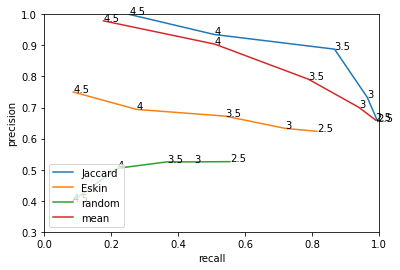

In [83]:
tresholds_recommended = [2.5, 3, 3.5, 4, 4.5]
treshold_used = 3.75

methods = [prediction, predicted_Eskin, random2, predicted_mean]

for method in methods:
    precisions = []
    recalls = []
    for treshold in tresholds_recommended:
        precisions.append(get_precision_recall(method, treshold, treshold_used)['precision'])
        recalls.append(get_precision_recall(method, treshold, treshold_used)['recall'])
    plt.plot(recalls, precisions)
    for r, p, t in zip(recalls, precisions, tresholds_recommended):
        plt.text(r, p, t)

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(['Jaccard', 'Eskin', 'random', 'mean'], loc = 'lower left')